Enter the value for demand mean:  100
Enter the value for demand standard deviation:  20
Enter the value for cost per unit:  50
Enter the value for maximum price:  150
Enter the value for minimum price:  80
Enter the value for initial price:  100
Enter the value for revenue objective:  2000


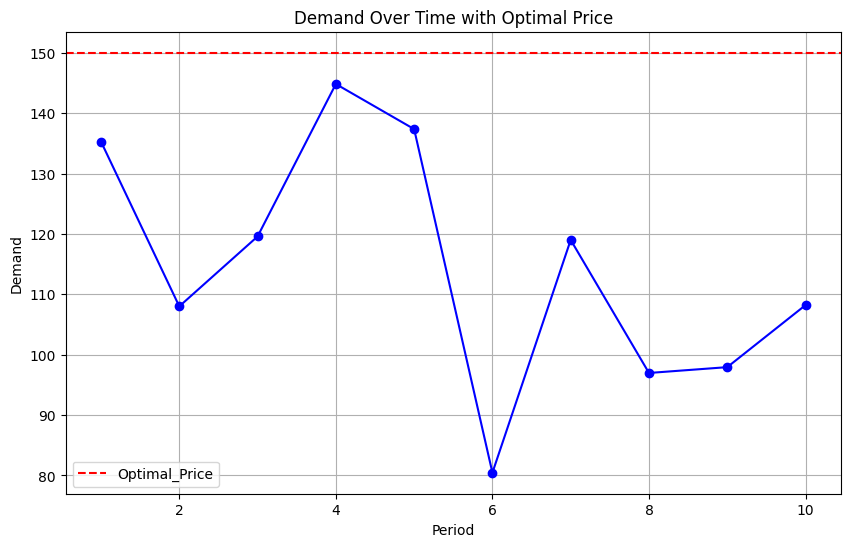

Optimal Price: 150.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pulp import *

# Function to get user input for a parameter with validation
def get_user_input(param_name, validation_func=None):
    while True:
        user_input = input(f"Enter the value for {param_name}: ")
        try:
            if validation_func is not None:
                if validation_func(user_input):
                    return float(user_input)
                else:
                    print(f"Invalid input for {param_name}. Please try again.")
            else:
                return float(user_input)
        except ValueError:
            print(f"Invalid input for {param_name}. Please enter a valid number.")

# Generate some sample demand data
np.random.seed(0)
num_periods = 10
demand_mean = get_user_input("demand mean")
demand_std = get_user_input("demand standard deviation", lambda x: float(x) > 0)
demand = np.random.normal(demand_mean, demand_std, num_periods)

# Define parameters
cost_per_unit = get_user_input("cost per unit", lambda x: float(x) >= 0)
max_price = get_user_input("maximum price", lambda x: float(x) > 0)
min_price = get_user_input("minimum price", lambda x: float(x) >= 0 and float(x) <= max_price)
initial_price = get_user_input("initial price")
revenue_objective = get_user_input("revenue objective", lambda x: float(x) >= 0)

# Define LP problem
prob = LpProblem("Dynamic_Pricing", LpMaximize)

# Define decision variables
price = LpVariable("Price", lowBound=min_price, upBound=max_price)

# Define objective function
prob += price * sum(demand) - cost_per_unit * sum(demand)

# Define constraints
prob += price >= min_price
prob += price <= max_price
prob += price * sum(demand) - cost_per_unit * sum(demand) >= revenue_objective

# Solve the problem
prob.solve()

# Extract the optimal price
optimal_price = value(price)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_periods + 1), demand, marker='o', linestyle='-', color='b')
plt.axhline(y=optimal_price, color='r', linestyle='--', label='Optimal_Price')
plt.xlabel('Period')
plt.ylabel('Demand')
plt.title('Demand Over Time with Optimal Price')
plt.legend()
plt.grid(True)
plt.show()

print("Optimal Price:", optimal_price)
